## About Bajaj Finserv
Bajaj Finserv was formed in April 2007 as a result of its demerger from Bajaj Auto Limited to further the Group’s interests in financial services. This demerger enabled Bajaj Finserv to independently run the core businesses of Lending, Protection and savings. Bajaj Finserv Limited is the holding company for the businesses dealing with financial services of the Bajaj Group. It serves millions of customers in the financial services space by providing solutions for asset acquisition through financing, asset protection through general insurance, family protection and income protection in the form of life and health insurance and retirement and savings solutions

#### Lending
Bajaj Finance Limited (BFL), participates in the financial business and is a company listed on The Stock Exchange, Mumbai (the BSE) and the National Stock Exchange (NSE).

BFL also operates through a 100% subsidiary namely, Bajaj Housing Finance Limited (BHFL) which is registered with National Housing Bank (NHB) as a Housing Finance Company (HFC) for its mortgage business. BHFL started its operations in FY2018 and all the incremental mortgage business is now done through BHFL.


#### Protection and savings
These are done through (i) Bajaj Allianz General Insurance Company Limited (BAGIC) for general insurance including health insurance; and (ii) Bajaj Allianz Life Insurance Company Limited (BALIC) for life insurance and retirement plans. BAGIC and BALIC are both unlisted joint ventures with Allianz SE, one of the world’s leading composite insurers.

#### Digital and Online Platform
During the year under review, Bajaj Financial Holdings Ltd., a wholly-owned subsidiary, has firmed up new business plans for undertaking activities on digital and online platform to augment the business of the Company’s subsidiaries and has changed its name to Bajaj Finserv Direct Ltd. with effect from 27 February 2018

In addition, there are wind-farm assets in Maharashtra with an installed capacity of 65.2 MW.


Please Note: Introduction is taken from https://www.bajajfinserv.in/about-us-about-bajaj-finserv

### About Dataset
The dataset used is NSE (NationaL Stock Exchange) from Kaggle.

Find the Dataset :https://www.kaggle.com/rohanrao/nifty50-stock-market-data.

I have taken Bajaj Finserve for my Analysis & Prediction.

### Steps to be Followed:

Step 1: Reading the File.

Step 2: Exploratory Data Analysis.

Step 3: Feature Engineering.

Step 4: Predictive Modelling.

Step 5: Evaluating MOdels.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go

In [15]:
# Reading the Train dataset 
Train_Dataset = pd.read_csv("Bajaj_Finserv_Train.csv")
Train_Dataset.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,3145446,1.726368e+14,NaN,908264,0.2888
1,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,4349144,2.488370e+14,NaN,677627,0.1558
2,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,4588759,2.837530e+14,NaN,774895,0.1689
3,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,4522302,2.982921e+14,NaN,1006161,0.2225
4,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,3057669,1.945929e+14,NaN,462832,0.1514


In [16]:
for col in Train_Dataset.columns:
    print("{} : {}".format(col,Train_Dataset[col].isna().sum()))
Train_Dataset.isna().sum()

Date : 0
Symbol : 0
Series : 0
Prev Close : 0
Open : 0
High : 0
Low : 0
Last : 0
Close : 0
VWAP : 0
Volume : 0
Turnover : 0
Trades : 745
Deliverable Volume : 0
%Deliverble : 0


Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                745
Deliverable Volume      0
%Deliverble             0
dtype: int64

In [17]:
# Data Summary
Train_Dataset.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3.079000e+03,3.079000e+03,2334.000000,3.079000e+03,3079.000000
mean,2504.751494,2508.813690,2547.193456,2468.443894,2506.134622,2505.879279,2508.602222,2.095991e+05,7.156727e+13,18104.206512,7.147824e+04,0.482672
std,2619.312125,2624.048336,2655.221067,2586.143114,2620.505312,2619.885744,2620.934202,4.156875e+05,1.534187e+14,28671.828120,1.473006e+05,0.215466
min,90.750000,88.150000,93.100000,88.150000,91.000000,90.750000,89.260000,4.570000e+02,1.376712e+10,149.000000,4.560000e+02,0.056200
25%,522.125000,522.250000,534.600000,513.050000,522.025000,522.125000,524.700000,3.876100e+04,2.634388e+12,2827.750000,1.999600e+04,0.306600
50%,950.350000,946.550000,968.000000,935.000000,948.200000,950.350000,952.030000,9.312600e+04,9.575787e+12,8063.000000,3.972200e+04,0.480900
75%,4863.200000,4870.550000,4985.000000,4728.450000,4867.575000,4870.125000,4879.665000,2.077740e+05,7.314922e+13,21193.500000,7.813650e+04,0.643400
max,9894.250000,9924.000000,9950.000000,9693.750000,9924.000000,9894.250000,9807.540000,6.271671e+06,2.049252e+15,293610.000000,3.804696e+06,1.000000


In [7]:
# Replacing the nan values with the mean of corresponding column
Train_Dataset = Train_Dataset.fillna(0)

In [18]:
Train_Dataset.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,3145446,1.726368e+14,NaN,908264,0.2888
1,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,4349144,2.488370e+14,NaN,677627,0.1558
2,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,4588759,2.837530e+14,NaN,774895,0.1689
3,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,4522302,2.982921e+14,NaN,1006161,0.2225
4,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,3057669,1.945929e+14,NaN,462832,0.1514


In [19]:
# Creating the New Dataset
new_dataset=pd.DataFrame(index=range(0,len(Train_Dataset)),columns=['Date','Close'])

for i in range(0,Test_Dataset.shape[0]):
    new_dataset["Date"][i]=Train_Dataset['Date'][i]
    new_dataset["Close"][i]=Train_Dataset["Close"][i]

In [20]:
# Converting Datetime into Date Format
new_dataset['Date']=pd.to_datetime(new_dataset['Date'])

In [21]:
# Converting Datetime into Date Format
Train_Dataset['Date']=pd.to_datetime(Train_Dataset['Date'])
Train_Dataset.set_index(['Date'],inplace=True)

<AxesSubplot:xlabel='Date'>

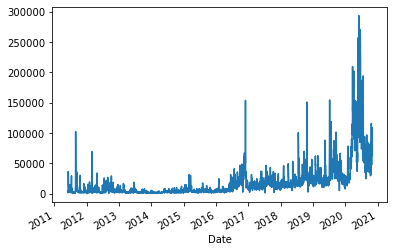

In [22]:
# PLotting the Trade
Train_Dataset.Trades.plot()

### Analysis:
#### 1. 

In [23]:
fig = go.Figure([go.Scatter(x=Train_Dataset.index, y=Train_Dataset['VWAP'])])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    title='VWAP over time',
    template="simple_white",
)
fig.update_xaxes(title="Date")
fig.update_yaxes(title="VWAP")
fig.show()

In [24]:
fig = go.Figure([go.Scatter(x=Train_Dataset.loc['2008', 'VWAP'].index,y=Train_Dataset.loc['2008', 'VWAP'])])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    title='VWAP in 2008',
    template="simple_white",
)
fig.update_xaxes(title="Date")
fig.update_yaxes(title="VWAP")

fig.show()

In [25]:
fig = go.Figure([go.Scatter(x=Train_Dataset.loc['2009', 'VWAP'].index,y=Train_Dataset.loc['2009', 'VWAP'])])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    title='VWAP in 2009',
    template="simple_white",
)
fig.update_xaxes(title="Date")
fig.update_yaxes(title="VWAP")

fig.show()

In [26]:
fig = go.Figure([go.Scatter(x=Train_Dataset.loc['2010', 'VWAP'].index,y=Train_Dataset.loc['2010', 'VWAP'])])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    title='VWAP in 2010',
    template="simple_white",
)
fig.update_xaxes(title="Date")
fig.update_yaxes(title="VWAP")

fig.show()

In [27]:
fig = go.Figure([go.Scatter(x=Train_Dataset.loc['2011', 'VWAP'].index,y=Train_Dataset.loc['2011', 'VWAP'])])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    title='VWAP in 2011',
    template="simple_white",
)
fig.update_xaxes(title="Date")
fig.update_yaxes(title="VWAP")

fig.show()

In [28]:
fig = go.Figure([go.Scatter(x=Train_Dataset.loc['2012', 'VWAP'].index,y=Train_Dataset.loc['2012', 'VWAP'])])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    title='VWAP in 2012',
    template="simple_white",
)
fig.update_xaxes(title="Date")
fig.update_yaxes(title="VWAP")

fig.show()

In [29]:
fig = go.Figure([go.Scatter(x=Train_Dataset.loc['2013', 'VWAP'].index,y=Train_Dataset.loc['2013', 'VWAP'])])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    title='VWAP in 2013',
    template="simple_white",
)
fig.update_xaxes(title="Date")
fig.update_yaxes(title="VWAP")

fig.show()

In [30]:
fig = go.Figure([go.Scatter(x=Train_Dataset.loc['2014', 'VWAP'].index,y=Train_Dataset.loc['2014', 'VWAP'])])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    title='VWAP in 2014',
    template="simple_white",
)
fig.update_xaxes(title="Date")
fig.update_yaxes(title="VWAP")

fig.show()

In [31]:
fig = go.Figure([go.Scatter(x=Train_Dataset.loc['2015', 'VWAP'].index,y=Train_Dataset.loc['2015', 'VWAP'])])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    title='VWAP in 2015',
    template="simple_white",
)
fig.update_xaxes(title="Date")
fig.update_yaxes(title="VWAP")

fig.show()

In [32]:
fig = go.Figure([go.Scatter(x=Train_Dataset.loc['2016', 'VWAP'].index,y=Train_Dataset.loc['2016', 'VWAP'])])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    title='VWAP in 2016',
    template="simple_white",
)
fig.update_xaxes(title="Date")
fig.update_yaxes(title="VWAP")

fig.show()

In [33]:
fig = go.Figure([go.Scatter(x=Train_Dataset.loc['2017', 'VWAP'].index,y=Train_Dataset.loc['2017', 'VWAP'])])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    title='VWAP in 2017',
    template="simple_white",
)
fig.update_xaxes(title="Date")
fig.update_yaxes(title="VWAP")

fig.show()

In [35]:
fig = go.Figure([go.Scatter(x=Train_Dataset.loc['2018', 'VWAP'].index,y=Train_Dataset.loc['2018', 'VWAP'])])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    title='VWAP in 2019',
    template="simple_white",
)
fig.update_xaxes(title="Date")
fig.update_yaxes(title="VWAP")

fig.show()

In [37]:
fig = go.Figure([go.Scatter(x=Train_Dataset.loc['2019', 'VWAP'].index,y=Train_Dataset.loc['2019', 'VWAP'])])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    title='VWAP in 2019',
    template="simple_white",
)
fig.update_xaxes(title="Date")
fig.update_yaxes(title="VWAP")

fig.show()

In [38]:
fig = go.Figure([go.Scatter(x=Train_Dataset.loc['2020', 'VWAP'].index,y=Train_Dataset.loc['2020', 'VWAP'])])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    title='VWAP in 2020',
    template="simple_white",
)
fig.update_xaxes(title="Date")
fig.update_yaxes(title="VWAP")

fig.show()

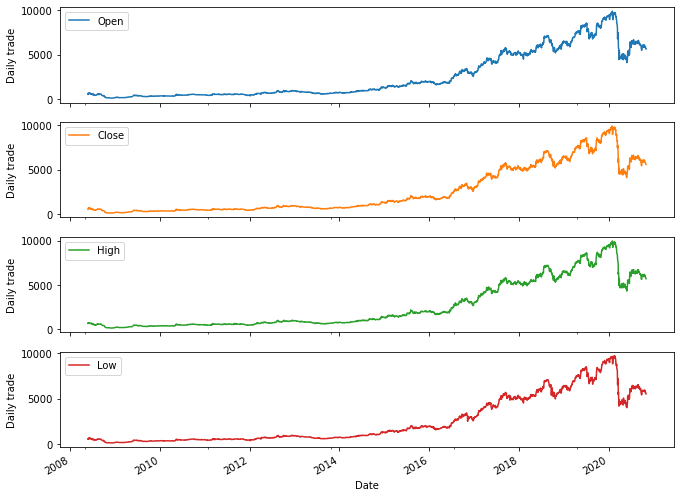

In [39]:
cols_plot = ['Open', 'Close', 'High','Low']
axes = Train_Dataset[cols_plot].plot(figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

### Predictive Modelling

In [40]:
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

from sklearn.preprocessing import MinMaxScaler

In [41]:
new_dataset = pd.read_csv("Bajaj_Finserv_Train.csv")
new_dataset.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,3145446,1.726368e+14,NaN,908264,0.2888
1,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,4349144,2.488370e+14,NaN,677627,0.1558
2,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,4588759,2.837530e+14,NaN,774895,0.1689
3,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,4522302,2.982921e+14,NaN,1006161,0.2225
4,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,3057669,1.945929e+14,NaN,462832,0.1514


In [42]:
new_dataset = new_dataset.drop(columns=['Symbol','Series','Turnover','Prev Close','Volume','Open','High','Low','Last','Trades','VWAP','Deliverable Volume','%Deliverble'])

In [43]:
# Converting Datetime into Date Format
new_dataset['Date']=pd.to_datetime(new_dataset['Date'])

In [44]:
new_dataset.head()

,Date,Close
0,2008-05-26,509.10
1,2008-05-27,554.65
2,2008-05-28,640.95
3,2008-05-29,632.40
4,2008-05-30,644.00


In [48]:
# Defining the Scalar for Dataset
scaler=MinMaxScaler(feature_range=(0,1))

# Getting the Series 
final_dataset=new_dataset.iloc[:,1:].values

# Scaling the Dataset
scaled_data=scaler.fit_transform(final_dataset)

x_train_data,y_train_data=[],[]

for i in range(60,len(scaled_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

# creating arrays for x_tarin and y_train
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

# reshaping the x_train so that It can be put as input to LSTM
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [49]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [50]:
# Initialisizng the model 
model= Sequential()

model.add(LSTM(units=50,return_sequences=True,kernel_initializer='glorot_uniform',input_shape=(x_train_data.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,kernel_initializer='glorot_uniform'))
model.add(Dropout(0.2))

model.add(Dense(units=1))

# Compiling the network
model.compile(optimizer='adam',loss='mean_squared_error')


#fitting the network
model.fit(x_train_data,y_train_data,batch_size=30,epochs=100)

Epoch 1/100
101/101 [==============================] - 18s 104ms/step - loss: 0.0352
Epoch 2/100
101/101 [==============================] - 10s 103ms/step - loss: 0.0027
Epoch 3/100
101/101 [==============================] - 10s 100ms/step - loss: 0.0025
Epoch 4/100
101/101 [==============================] - 11s 110ms/step - loss: 0.0025
Epoch 5/100
101/101 [==============================] - 11s 104ms/step - loss: 0.0023
Epoch 6/100
101/101 [==============================] - 10s 102ms/step - loss: 0.0020
Epoch 7/100
101/101 [==============================] - 10s 98ms/step - loss: 0.0020
Epoch 8/100
101/101 [==============================] - 12s 116ms/step - loss: 0.0017
Epoch 9/100
101/101 [==============================] - 12s 122ms/step - loss: 0.0019
Epoch 10/100
101/101 [==============================] - 10s 102ms/step - loss: 0.0017
Epoch 11/100
101/101 [==============================] - 12s 120ms/step - loss: 0.0015
Epoch 12/100
101/101 [==============================] - 13s 133m

101/101 [==============================] - 11s 111ms/step - loss: 7.4245e-04
Epoch 94/100
101/101 [==============================] - 10s 102ms/step - loss: 6.4842e-04
Epoch 95/100
101/101 [==============================] - 11s 106ms/step - loss: 6.1470e-04
Epoch 96/100
101/101 [==============================] - 10s 102ms/step - loss: 6.3717e-04
Epoch 97/100
101/101 [==============================] - 11s 106ms/step - loss: 7.3411e-04
Epoch 98/100
101/101 [==============================] - 11s 106ms/step - loss: 6.9534e-04
Epoch 99/100
101/101 [==============================] - 10s 100ms/step - loss: 7.2328e-04
Epoch 100/100
101/101 [==============================] - 10s 102ms/step - loss: 6.1919e-04


In [51]:
# Reading the Train dataset 
Test_Dataset = pd.read_csv("Bajaj_Finserv_Test.csv")
Test_Dataset.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2020-11-02,BAJAJFINSV,EQ,5573.50,5601.4,5725.0,5560.00,5695.0,5701.45,5652.25,491399,2.777509e+14,49144.0,97408,0.1982
1,2020-11-03,BAJAJFINSV,EQ,5701.45,5752.0,5810.0,5696.70,5743.0,5743.60,5752.63,575536,3.310847e+14,49113.0,134949,0.2345
2,2020-11-04,BAJAJFINSV,EQ,5743.60,5743.6,5839.0,5715.95,5797.5,5811.85,5784.12,590961,3.418187e+14,50493.0,168468,0.2851
3,2020-11-05,BAJAJFINSV,EQ,5811.85,5855.0,6080.6,5845.25,6057.3,6055.15,5981.19,848673,5.076075e+14,88905.0,240434,0.2833
4,2020-11-06,BAJAJFINSV,EQ,6055.15,6025.0,6350.0,6025.00,6266.0,6286.45,6240.77,1559339,9.731484e+14,132225.0,313139,0.2008


In [55]:
Test= Test_Dataset.iloc[:, 7:8].values 
Train_Test= pd.concat([Train_Dataset['Open'],Test_Dataset['Open']],axis=0)
Test_Data = Train_Test[len(Train_Test)-len(Test_Dataset)-60:].values
Test_Data= Test_Data.reshape(-1,1) 
Test_Data= scaler.fit_transform(Test_Data)

In [56]:
x_test= []
for i in range(60,80):
    #creating input for lstm prediction
    x_test.append(Test_Data[i-60:i,0]) 

In [57]:
x_test= np.array(x_test)

In [58]:
x_test= np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_value= model.predict(x_test)

In [59]:
predicted_value= scaler.inverse_transform(predicted_value)

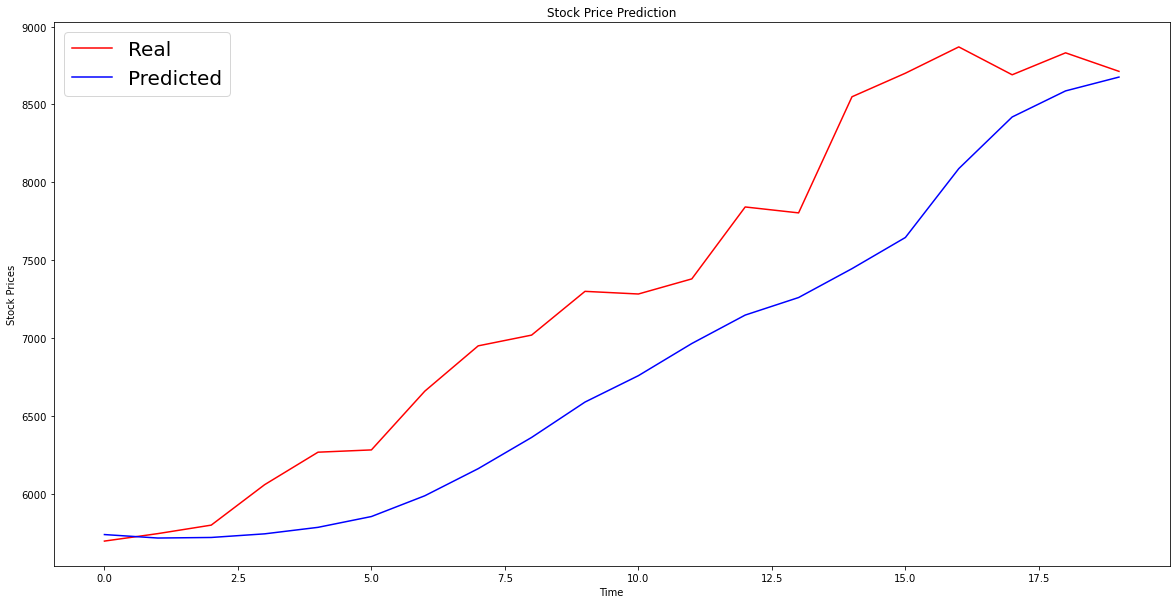

In [60]:
plt.figure(figsize=(20,10))
plt.plot(Test,'red',label='Real')
plt.plot(predicted_value,'blue',label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Stock Price Prediction')
plt.legend(loc='best', fontsize=20)